In [95]:
#Import Libraries

In [96]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer


In [97]:
# 1. Read the dataset to Python environment

In [98]:
iris_data = pd.read_excel('/iris.xls')

In [99]:
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [100]:
iris_data.shape

(150, 5)

In [101]:
iris_data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [102]:
iris_data.groupby('Classification').size()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [103]:
#Data Visualization

<Axes: xlabel='SL', ylabel='SW'>

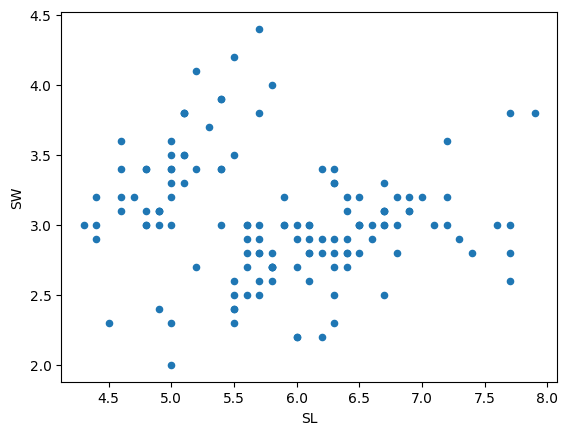

In [104]:
iris_data.plot(kind="scatter", x="SL", y="SW")

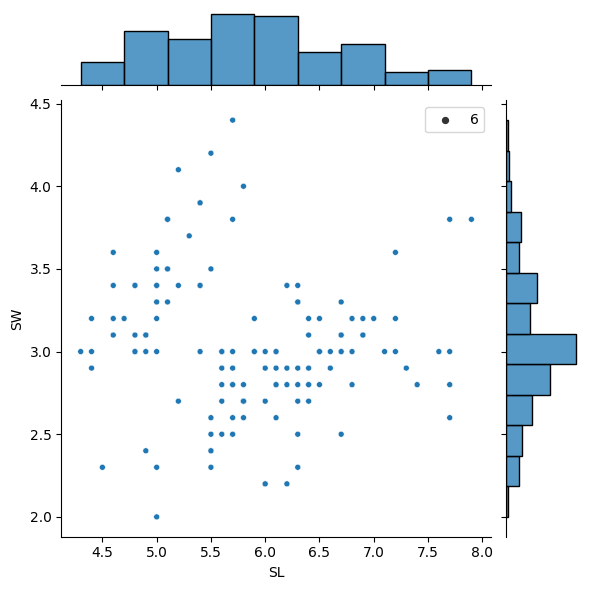

In [105]:
sns.jointplot(x="SL", y="SW", data=iris_data, size=6)

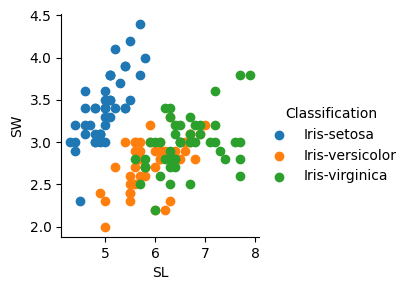

In [106]:
sns.FacetGrid(iris_data, hue="Classification") \
   .map(plt.scatter, "SL", "SW") \
   .add_legend()

<Axes: xlabel='Classification', ylabel='PL'>

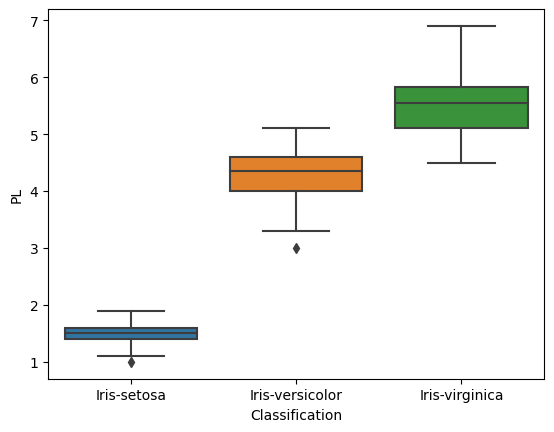

In [107]:
sns.boxplot(x="Classification", y="PL", data=iris_data)

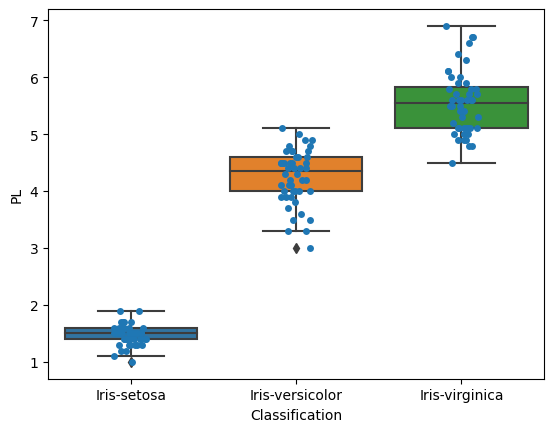

In [108]:
ax = sns.boxplot(x="Classification", y="PL", data=iris_data)
ax = sns.stripplot(x="Classification", y="PL", data=iris_data, jitter=True, edgecolor="black")

<Axes: xlabel='Classification', ylabel='PL'>

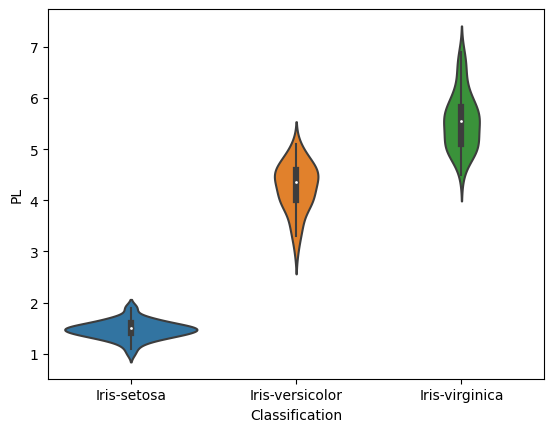

In [109]:
sns.violinplot(x="Classification", y="PL", data=iris_data, size=6)

In [110]:
# Separate features and target variable
X = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values

In [111]:
# 2. Pre-processing steps

In [112]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [113]:

# Handle missing values (NaN)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [114]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# 3. Classification model evaluation

In [116]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}
    
    


In [117]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 1.00
Decision Tree Accuracy: 1.00
K-Nearest Neighbors Accuracy: 0.97
Support Vector Machine Accuracy: 1.00
Naive Bayes Accuracy: 1.00


Based on the accuracy scores, all of the models (Logistic Regression, Decision Tree, Support Vector Machine, and Naive Bayes) have achieved perfect accuracy of 1.00, except for K-Nearest Neighbors with an accuracy of 0.97.

When choosing the best model, several factors should be considered, such as the specific task, the dataset used for training and testing, the interpretability of the model, computational requirements, scalability, and robustness to outliers and noise.